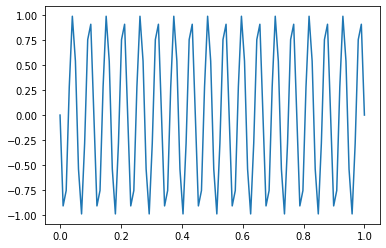

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style()

def sinsig(n, a, f, fs, time=1.0, phi = 0):
    x = np.linspace(0, time, n)
    x = x[:100]
    y = a * np.sin(2 * f * np.pi * n * x + phi)
    return x, y

f, fs, a, n, time = 18000, 48000, 1.0, 100, 0.0025

x, pulse = sinsig(n, a, f, fs)
plt.plot(x, pulse)

001000000101010001110011011010010110111001100111011010000111010101100001001000000101010101101110011010010111011001100101011100100111001101101001011101000111100100100000 168
[0 2 0 0 1 1 1 0 1 3 0 3 1 2 2 1 1 2 3 2 1 2 1 3 1 2 2 0 1 3 1 1 1 2 0 1 0
 2 0 0 1 1 1 1 1 2 3 2 1 2 2 1 1 3 1 2 1 2 1 1 1 3 0 2 1 3 0 3 1 2 2 1 1 3
 1 0 1 3 2 1 0 2 0 0]


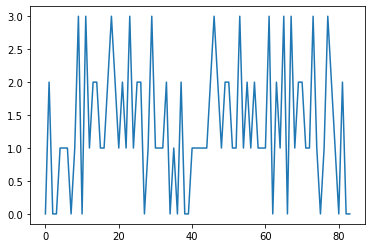

In [43]:
delta = 150
pause = [np.zeros((1, i * delta), dtype=np.float) for i in range(1, 5)]

from binascii import hexlify
my_str = ' Tsinghua University '
#my_str = '0000010100001010000011110000110000001000' # Project介绍里面要求用这个 5字节的16进制数5afc8
def encode(x):
    info = ''.join([bin(ord(ch))[2:].zfill(8) for ch in x])
    print(info, len(info))
    arr = [int(info[2 * i:2 * i + 2], 2) for i in range(len(info) // 2)]
    arr = np.array(arr, dtype=np.short)
    print(arr)
    return arr
arr = encode(my_str)
plt.plot(arr)

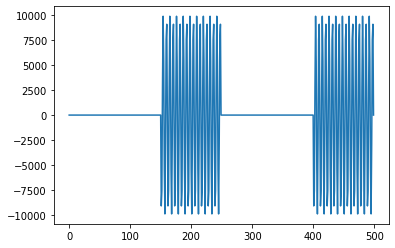

In [46]:
def syth(pulse, arr):
    sig = [np.append(pulse, pause[i]) for i in arr]
    sig = np.concatenate(sig, axis=0)
    sig = np.append(pause[3], sig)
    for _ in range(100):
        sig = np.append(pulse, sig)
    sig = np.append(pause[3], sig)
    sig = np.append(sig, pulse)
    return sig
sig = syth(pulse, arr)
sigout = sig * 10000
sigout = sigout.astype(np.short)
x = np.linspace(0, 1, len(sigout))
plt.plot(sigout[-500:])

In [47]:
import wave
from scipy.io import wavfile
def writewav(data, filename, fs):
    print(data)
    '''
    with wave.open(filename, 'wb') as f:
        f.setnchannels(1)
        f.setsampwidth(2)
        f.setframerate(fs)
        f.writeframes(data.tostring())
        print(len(data))
        print(type(data[0]))
        print(len(data.tostring()))
    '''
    wavfile.write(filename, fs, data)
writewav(sigout, 'sample_150_100.wav', fs)

[   0    0    0 ... 7557 9096    0]


[ 19.30169738 -53.29275875  -6.37139818 ... 790.67884699 893.03515221
   8.08979913]


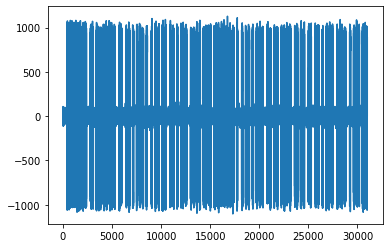

In [28]:
def awgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

n = awgn(sig, 20)
sign = sig + n
sign = sign * 1000
#sign = sign.astype(np.short)
#sign = sign * 1000
print(sign)
plt.plot(sign[:])

In [22]:
writewav(sign, 'noise.wav', fs)

[  45.18701512   20.41444986   57.93748031 ...  812.78023458 1006.87216677
   65.08364974]
